In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array, load_img, array_to_img

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

class_names = ['Gun', 'Not Gun']
data_dir = "gun_data"
positive_class = class_names[0].lower() # "gun" / "knife" ..

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255

)

2023-05-17 00:52:36.903157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 00:52:38.468555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# # Augmentation
# # ============
# # Create ~30 random samples of the training data in a folder just to see what comes out


# import random, os

# test_dir = f'{data_dir}/train/{positive_class}/'
# random_choice_image = random.choice(os.listdir(test_dir)) #change dir name to whatever
# random_test_image = os.path.join(test_dir,random_choice_image)
# print(random_choice_image)

# img = load_img(random_test_image)
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)


# i = 0
# for batch in train_datagen.flow(x, 
#                           batch_size=1, 
#                           save_to_dir=f"data/preview/train/{positive_class}", 
#                           save_prefix=positive_class, 
#                           save_format='jpg'):
#     i += 1
#     if i > 30:
#         break


In [3]:
batch_size=128
width = 300
height = 300
channels = 3

train_generator = train_datagen.flow_from_directory(
    f"{data_dir}/train/",
    target_size=(width, height),
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    f"{data_dir}/validation/",
    target_size=(width, height),
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    f"{data_dir}/test/",
    target_size=(width, height),
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)


Found 4364 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
Found 1210 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(width, height, channels)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [6]:
from keras.optimizers import RMSprop, Adam

model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
            #   optimizer='adam',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

file_name = f'weights/{positive_class}/weights.h5'

In [7]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=8,
#     epochs=30,
# #     validation_split=0.1,
#     validation_data=validation_generator,    
#     validation_steps=8,
#     verbose=1)

# model.save_weights(file_name)


Epoch 1/30
1/8 [==>...........................] - ETA: 46s - loss: 0.6946 - accuracy: 0.5469

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


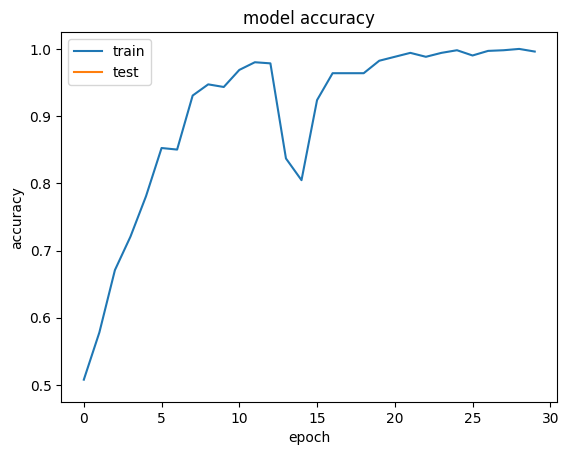

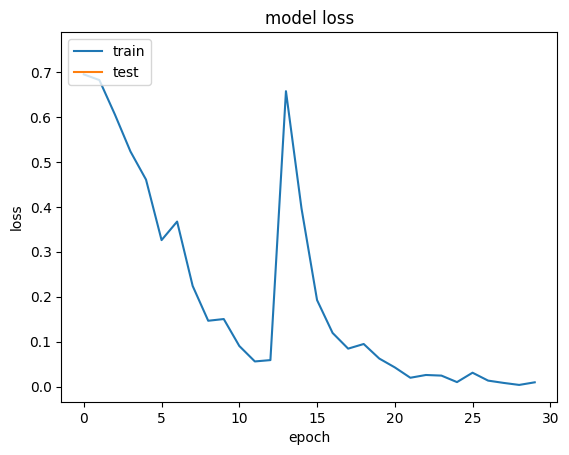

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model.load_weights(file_name)

In [8]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.016932452097535133
Test accuracy: 0.9975206851959229


1/1 [==============================] - 0s 21ms/step


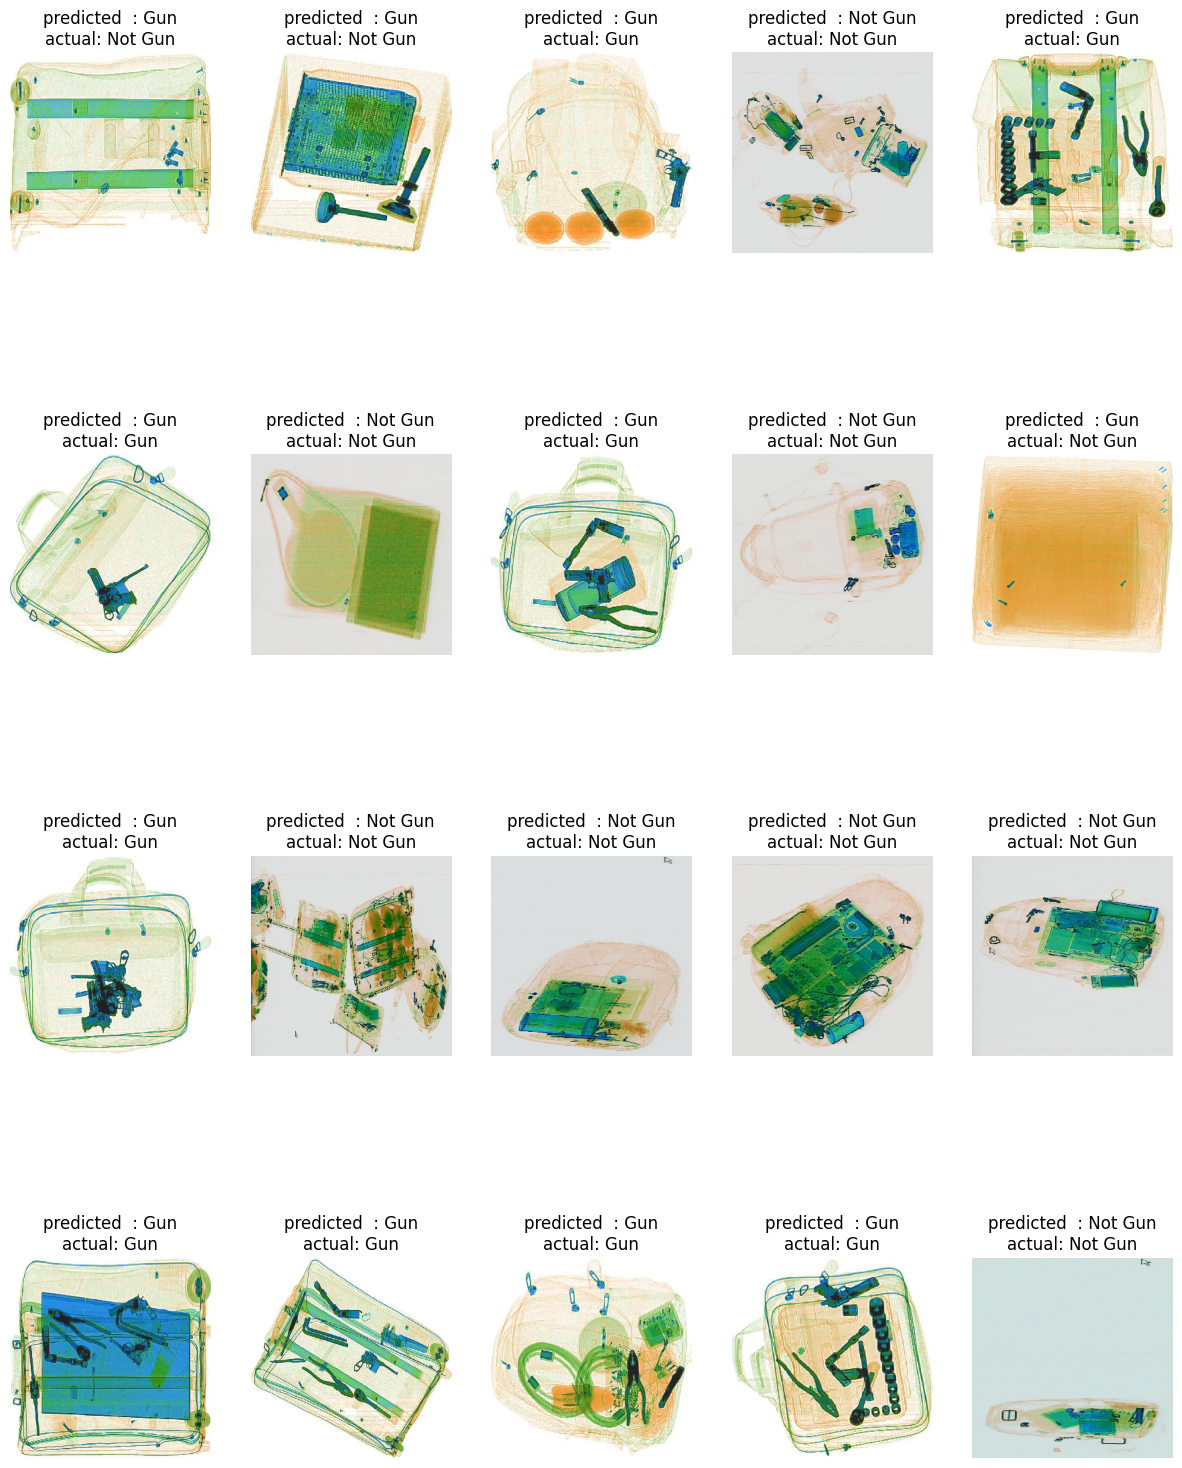

In [9]:
import random
import random
from matplotlib import pyplot as plt

images, labels = next(validation_generator)

plt.figure(figsize=(15,20))
for n in range(20):
    x = random.randrange(128)  
    ax = plt.subplot(4,5,n+1)
    plt.imshow(images[x])
    predicted = model.predict(images[x: x+1])[0][0]
    type = 0
    if predicted >= 0.5:
        type = 1
    plt.title(f"predicted  : {class_names[type]}\nactual: {class_names[int(labels[x])]}")
    plt.axis('off')


In [ ]:
from keras import metrics

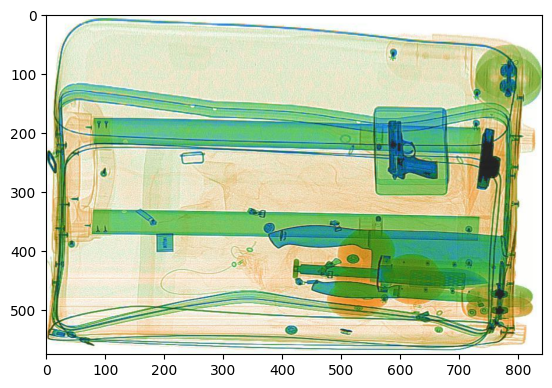

1/1 [==============================] - 0s 27ms/step
Prediction: 0.0


In [39]:
import numpy as np
from keras.preprocessing import image
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Choose a random positive Image
test_dir = f'{data_dir}/test/{positive_class}/'
random_choice_image = random.choice(os.listdir(test_dir)) #change dir name to whatever
random_test_image = os.path.join(test_dir,random_choice_image)

# random_test_image = "/home/eli/dev/school/data-science/tensorflow/knife_data/test/knives/P00029.jpg"

# Print Image
img = mpimg.imread(random_test_image)
imgplot = plt.imshow(img)
plt.show()

# Predict the result for this specific image (Should be positive)
test = load_img(random_test_image, target_size=(300, 300))
test = np.expand_dims(test, axis=0)
prediction = model.predict(test)[0][0]
print(f"Prediction: {prediction}")


In [32]:
prediction

0.0

In [25]:
train_generator.class_indices

{'gun': 0, 'notgun': 1}